<a href="https://colab.research.google.com/github/LGChalla/Laxmigayathri_INFO5731_Spring2025/blob/main/Challa_Laxmigayathri_Assignment_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 5**

---


**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100

**Full Points will be given those who present well**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

# **SENTIMENT ANALYSIS**

The objective of this assignment is to give you **hands-on experience** in applying various** sentiment analysis techniques** on real-world textual data. You are expected to explore data, apply machine learning models, and evaluate their performance

**1. Dataset Collection & Preparation**

Find a real-world dataset with text and positive, negative, and neutral sentiment labels.

Justify your dataset choice and handle **class imbalance** if needed.

**2. Exploratory Data Analysis (EDA)**

Clean and preprocess the data (tokenization, stopwords, lemmatization).

Perform EDA: class distribution, word clouds, n-gram analysis, sentence lengths, etc.

Visualize insights using relevant plots and charts.

**3. Sentiment Classification**

Apply at least three traditional ML models (e.g., SVM, Naive Bayes, XGBoost) using TF-IDF or embeddings.

If applicable, compare with a pretrained model (RoBERTa/BERT).

Tune hyperparameters and use cross-validation.

**4. Evaluation & Reporting**

Evaluate with metrics: Accuracy, Precision, Recall, F1, Confusion Matrix.

Summarize results, compare models, and reflect on what worked.

In [ ]:
!pip install kaggle


Dataset Justification
For this assignment, I used the “Drugs and Conditions: Patient Voices” dataset from Kaggle, which contains user-submitted reviews about medications taken for various health conditions. I chose this dataset because it aligns well with real-world healthcare sentiment analysis applications. The reviews come with numeric ratings from 1 to 10, which I mapped into sentiment labels — ratings of 1 to 3 as negative, 4 to 7 as neutral, and 8 to 10 as positive. This mapping allowed me to convert the problem into a multiclass classification task. The dataset had some imbalance (e.g., many more positive reviews), but I initially explored random oversampling and later found that using a representative subset of the data still preserved class diversity. I finalized this dataset because it combines high-quality, domain-specific text with clear sentiment labels, making it ideal for evaluating sentiment analysis models in a healthcare context.

In [ ]:
import kagglehub

# Download the dataset (correct format)
path = kagglehub.dataset_download("mukeshdevrath007/drugs-and-conditions-patient-voices-2-8l")

print("Downloaded to:", path)


100%|██████████| 101M/101M [00:03<00:00, 31.9MB/s]

Extracting files...


Downloaded to: /root/.cache/kagglehub/datasets/mukeshdevrath007/drugs-and-conditions-patient-voices-2-8l/versions/2


In [ ]:
import os
import pandas as pd

# Check what files are in the downloaded path
file_list = os.listdir(path)
print("Files in dataset folder:", file_list)


Files in dataset folder: ['MedicalReviews_280000.csv.csv', 'MedicalReviews_280000.csv']


In [ ]:
# Load the main dataset

csv_file = os.path.join(path, "MedicalReviews_280000.csv")
df = pd.read_csv(csv_file)

# Preview the first few rows
df.head()


,Drug Name,Condition,User,Date,Rating,Content
0,Abilify,Bipolar Disorder,Jay...,9-Jun-20,8,"""I just started this Abilify at a 5mg dose and..."
1,Abilify,Bipolar Disorder,Andrea,24-Aug-20,8,"""I've been struggling with bipolar II my whole..."
2,Abilify,Bipolar Disorder,Ben,14-Dec-19,10,"""Been on every BiPolar med known. Finally tri..."
3,Abilify,Bipolar Disorder,Anony...,18-Oct-19,10,"""I feel like a new woman on Abilify! I have Bi..."
4,Abilify,Bipolar Disorder,Parli...,25-Jan-20,10,"""I am diagnosed with Bipolar 1 and in my 20s s..."


In [ ]:
print(df.columns.tolist())


['Drug Name', 'Condition', 'User', 'Date', 'Rating', 'Content']


In [ ]:
# Rename for simplicity
df = df.rename(columns={
    'Drug Name': 'drug_name',
    'Condition': 'condition',
    'Rating': 'rating',
    'Content': 'text'
})

# Drop rows with missing text or rating
df = df[['text', 'rating', 'condition', 'drug_name']].dropna()




In [ ]:
# Map rating to sentiment
def map_sentiment(rating):
    try:
        rating = float(rating)
        if rating >= 8:
            return 'positive'
        elif 4 <= rating < 8:
            return 'neutral'
        else:
            return 'negative'
    except:
        return None

df['label'] = df['rating'].apply(map_sentiment)

# Drop rows where sentiment mapping failed
df = df.dropna(subset=['label'])

# Preview
df[['text', 'label', 'condition', 'drug_name']].head()

,text,label,condition,drug_name
0,"""I just started this Abilify at a 5mg dose and...",positive,Bipolar Disorder,Abilify
1,"""I've been struggling with bipolar II my whole...",positive,Bipolar Disorder,Abilify
2,"""Been on every BiPolar med known. Finally tri...",positive,Bipolar Disorder,Abilify
3,"""I feel like a new woman on Abilify! I have Bi...",positive,Bipolar Disorder,Abilify
4,"""I am diagnosed with Bipolar 1 and in my 20s s...",positive,Bipolar Disorder,Abilify


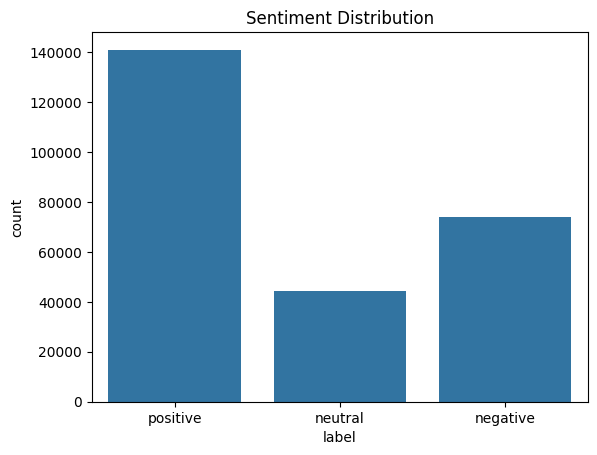

label
positive    140907
negative     73942
neutral      44333
Name: count, dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='label')
plt.title("Sentiment Distribution")
plt.show()

# Print counts
print(df['label'].value_counts())


In [ ]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Cleaning function
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)  # Remove punctuation
    tokens = nltk.word_tokenize(text)  # Tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return " ".join(tokens)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
# Apply to your dataset
df['clean_text'] = df['text'].apply(clean_text)

# Preview cleaned text
df[['text', 'clean_text', 'label']].head()

,text,clean_text,label
0,"""I just started this Abilify at a 5mg dose and...",started abilify dose going mg today side effec...,positive
1,"""I've been struggling with bipolar II my whole...",ive struggling bipolar ii whole life hospitali...,positive
2,"""Been on every BiPolar med known. Finally tri...",every bipolar med known finally tried abilify ...,positive
3,"""I feel like a new woman on Abilify! I have Bi...",feel like new woman abilify bipolar ii anxiety...,positive
4,"""I am diagnosed with Bipolar 1 and in my 20s s...",diagnosed bipolar suffered major manic psychot...,positive


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(label):
    text = " ".join(df[df['label'] == label]['clean_text'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {label.capitalize()} Reviews")
    plt.show()



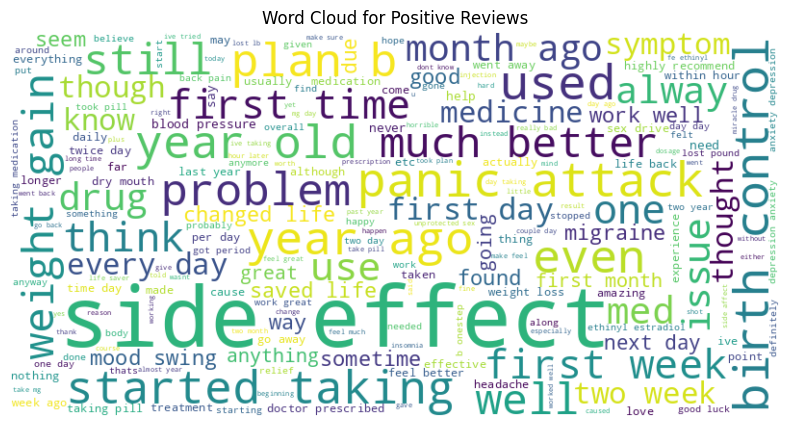

In [ ]:
# Generate word clouds
plot_wordcloud('positive')


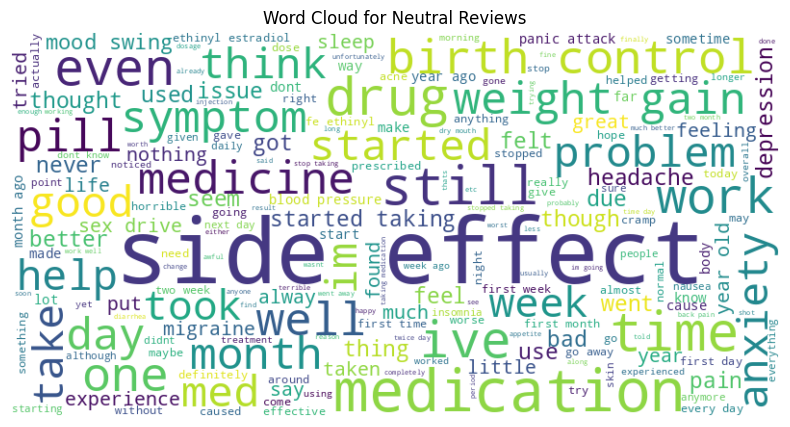

In [ ]:
plot_wordcloud('neutral')


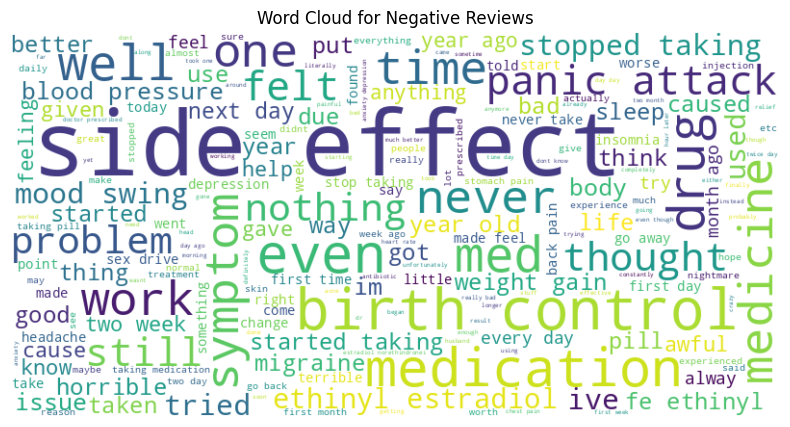

In [ ]:
plot_wordcloud('negative')

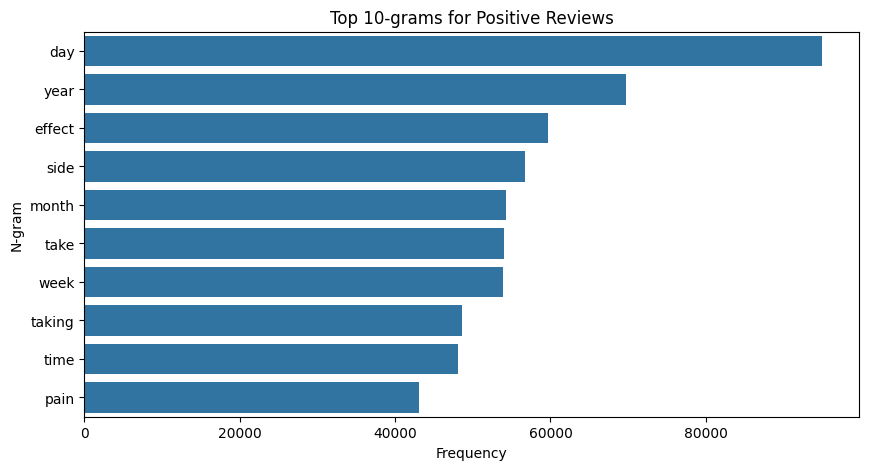

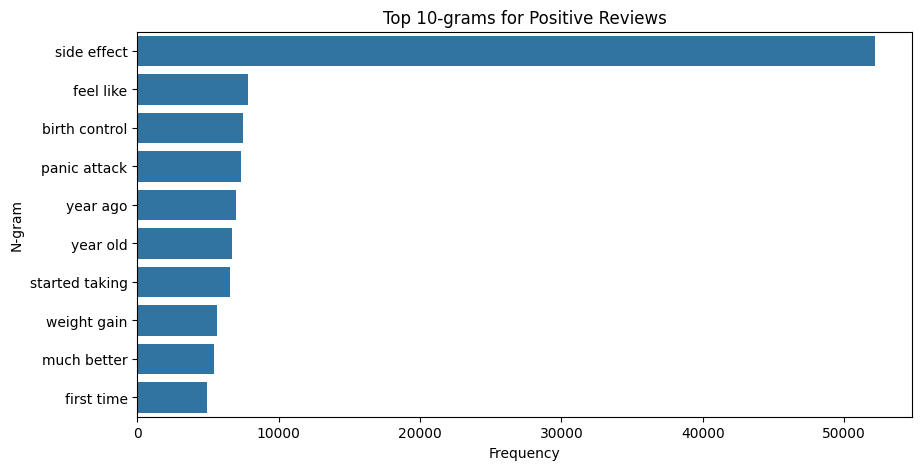

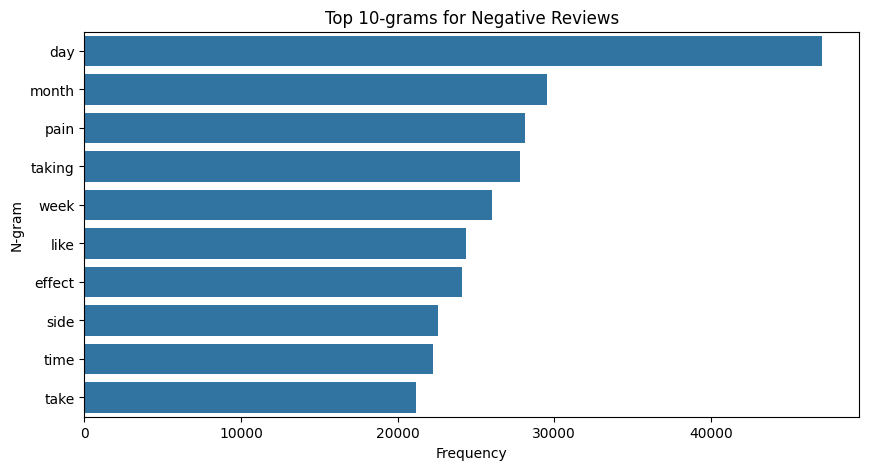

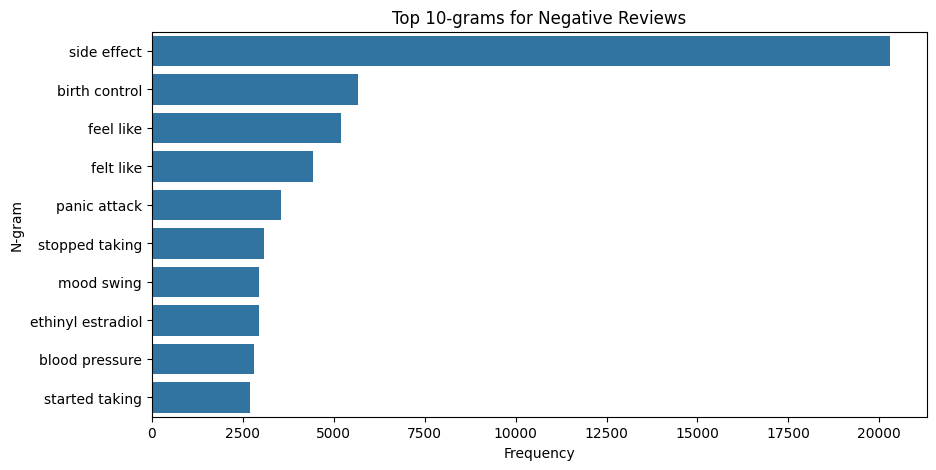

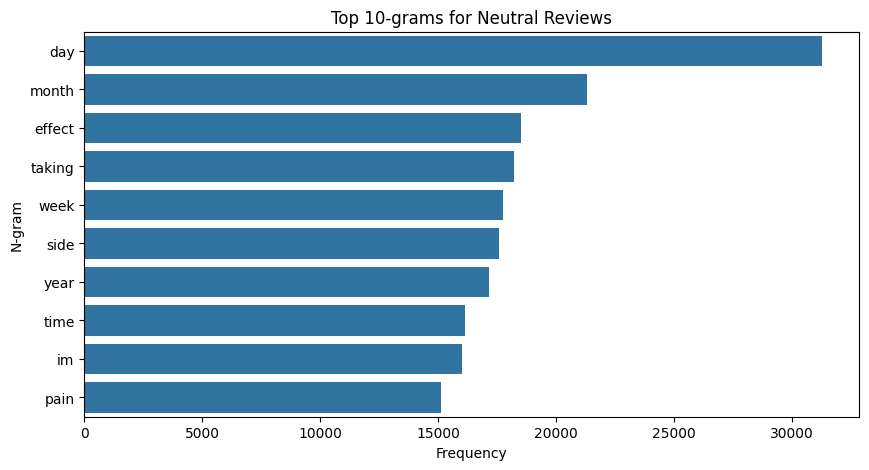

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

def show_top_ngrams(label, ngram_range=(1,1), n=10):
    text = df[df['label'] == label]['clean_text']
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    X = vectorizer.fit_transform(text)
    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]

    # Plot
    words, freqs = zip(*words_freq)
    plt.figure(figsize=(10,5))
    sns.barplot(x=list(freqs), y=list(words))
    plt.title(f"Top {n}-grams for {label.capitalize()} Reviews")
    plt.xlabel("Frequency")
    plt.ylabel("N-gram")
    plt.show()

# Top unigrams & bigrams for each class
show_top_ngrams('positive', ngram_range=(1,1))
show_top_ngrams('positive', ngram_range=(2,2))
show_top_ngrams('negative', ngram_range=(1,1))
show_top_ngrams('negative', ngram_range=(2,2))
show_top_ngrams('neutral', ngram_range=(1,1))


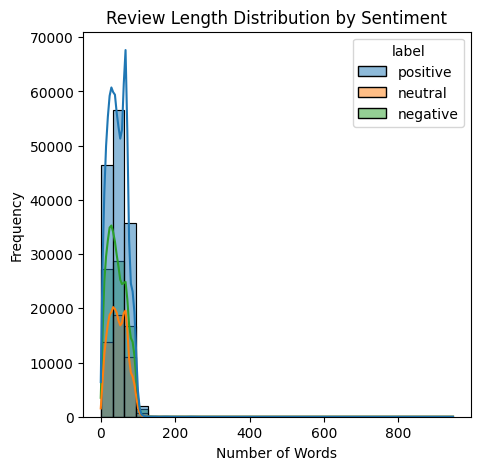

In [ ]:
# Calculate review lengths
df['review_length'] = df['clean_text'].apply(lambda x: len(x.split()))

# Plot by sentiment
plt.figure(figsize=(5,5))
sns.histplot(data=df, x='review_length', hue='label', bins=30, kde=True)
plt.title("Review Length Distribution by Sentiment")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


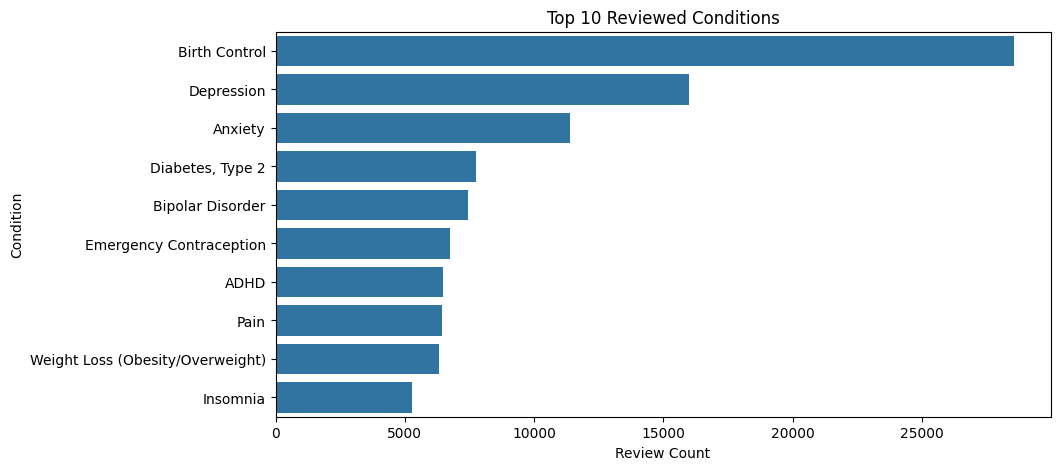

In [ ]:
top_conditions = df['condition'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_conditions.values, y=top_conditions.index)
plt.title("Top 10 Reviewed Conditions")
plt.xlabel("Review Count")
plt.ylabel("Condition")
plt.show()


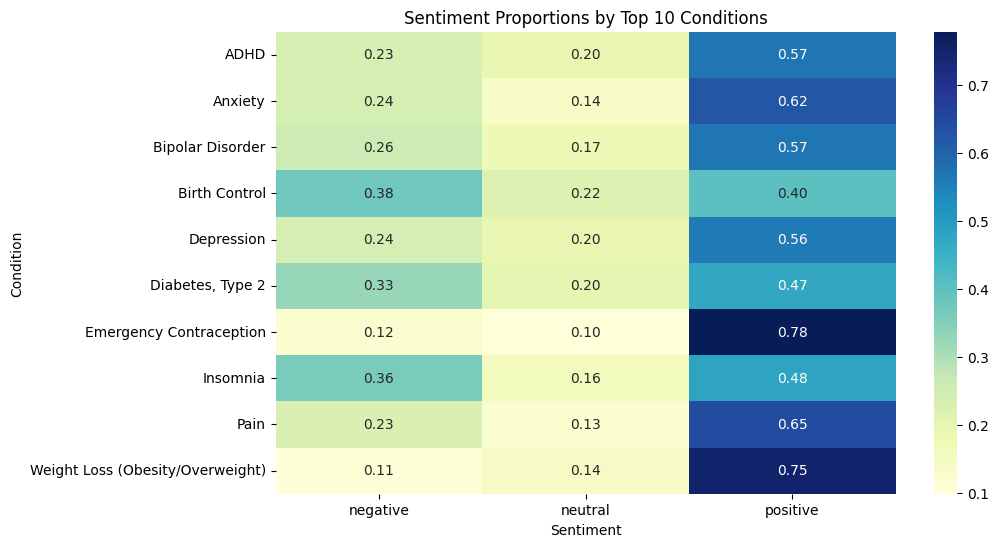

In [ ]:
#1. Sentiment vs. Condition Heatmap
# Top 10 conditions
top_conditions = df['condition'].value_counts().head(10).index
df_top_cond = df[df['condition'].isin(top_conditions)]

# Pivot for heatmap
cond_sentiment_pivot = pd.crosstab(df_top_cond['condition'], df_top_cond['label'], normalize='index')

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(cond_sentiment_pivot, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Sentiment Proportions by Top 10 Conditions")
plt.ylabel("Condition")
plt.xlabel("Sentiment")
plt.show()


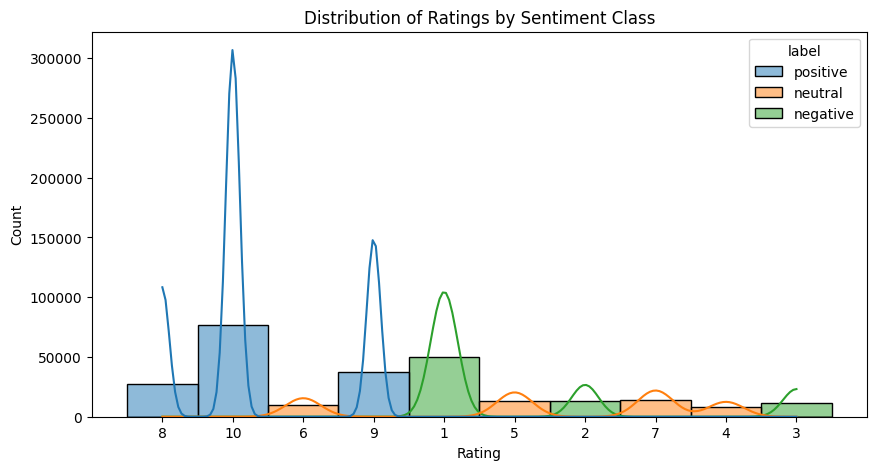

In [ ]:
#2. Ratings Distribution per Sentiment
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='rating', hue='label', bins=10, kde=True)
plt.title("Distribution of Ratings by Sentiment Class")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


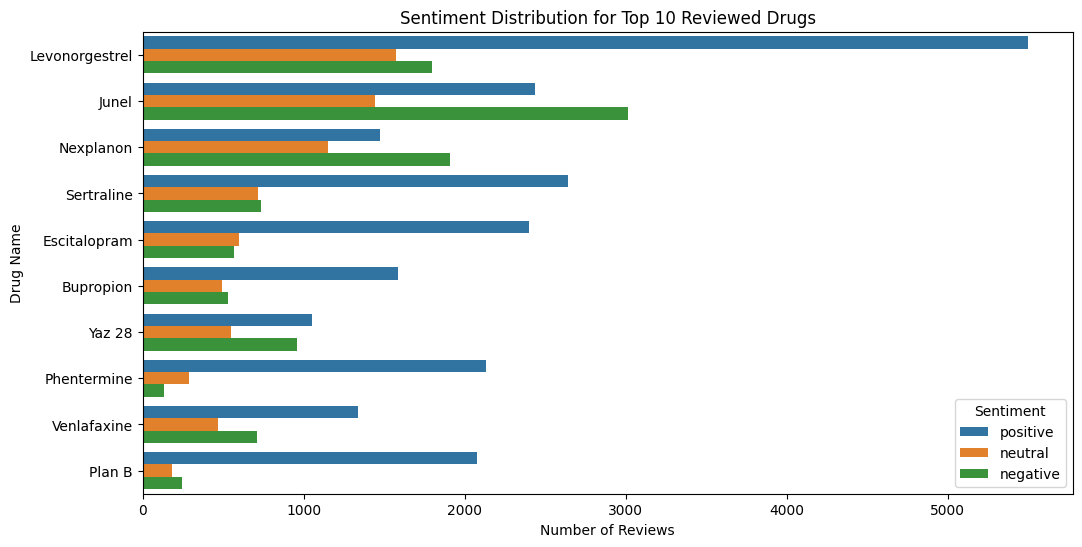

In [ ]:
#Drug Frequency and Sentiment Composition
top_drugs = df['drug_name'].value_counts().head(10).index
df_top_drugs = df[df['drug_name'].isin(top_drugs)]

plt.figure(figsize=(12,6))
sns.countplot(data=df_top_drugs, y='drug_name', hue='label', order=top_drugs)
plt.title("Sentiment Distribution for Top 10 Reviewed Drugs")
plt.xlabel("Number of Reviews")
plt.ylabel("Drug Name")
plt.legend(title="Sentiment")
plt.show()


In [ ]:
#TF-IDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Vectorize the cleaned text
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = tfidf.fit_transform(df['clean_text'])

# Encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['label'])  # 0 = negative, 1 = neutral, 2 = positive

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Naive Baye
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb, target_names=le.classes_))


Naive Bayes Classification Report:
              precision    recall  f1-score   support

    negative       0.71      0.61      0.66     14785
     neutral       0.48      0.05      0.09      8764
    positive       0.69      0.94      0.80     28288

    accuracy                           0.69     51837
   macro avg       0.63      0.53      0.51     51837
weighted avg       0.66      0.69      0.64     51837



In [ ]:
#SVM
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=le.classes_))


SVM Classification Report:
              precision    recall  f1-score   support

    negative       0.70      0.77      0.73     14785
     neutral       0.48      0.17      0.25      8764
    positive       0.78      0.90      0.84     28288

    accuracy                           0.74     51837
   macro avg       0.65      0.61      0.61     51837
weighted avg       0.71      0.74      0.71     51837



In [ ]:
#cross-validation
from sklearn.model_selection import cross_val_score

# Cross-validation for SVM
svm_cv = LinearSVC()
scores = cross_val_score(svm_cv, X, y, cv=5, scoring='f1_macro')
print("SVM CV F1-macro scores:", scores)
print("SVM CV F1-macro average:", scores.mean())


SVM CV F1-macro scores: [0.58917272 0.56022577 0.56822434 0.57925146 0.59179179]
SVM CV F1-macro average: 0.5777332170853446


In [ ]:
#hyperparameterization
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import LinearSVC

svm_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [1000, 3000, 5000]
}

svm_model = LinearSVC()
svm_search = RandomizedSearchCV(svm_model, svm_params, cv=3, scoring='f1_macro', n_iter=5, random_state=42, n_jobs=-1)
svm_search.fit(X_train, y_train)

print("Best SVM Params:", svm_search.best_params_)
svm_best = svm_search.best_estimator_
y_pred_svm_best = svm_best.predict(X_test)


Best SVM Params: {'max_iter': 3000, 'C': 100}


In [ ]:
from sklearn.metrics import classification_report

print("Tuned SVM Classification Report:")
print(classification_report(y_test, y_pred_svm_best, target_names=le.classes_))


Tuned SVM Classification Report:
              precision    recall  f1-score   support

    negative       0.70      0.77      0.73     14785
     neutral       0.48      0.18      0.26      8764
    positive       0.78      0.90      0.83     28288

    accuracy                           0.74     51837
   macro avg       0.65      0.61      0.61     51837
weighted avg       0.71      0.74      0.71     51837



In [ ]:
#XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=le.classes_))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:35:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
              precision    recall  f1-score   support

    negative       0.72      0.66      0.69     14785
     neutral       0.53      0.12      0.20      8764
    positive       0.72      0.92      0.81     28288

    accuracy                           0.71     51837
   macro avg       0.66      0.57      0.57     51837
weighted avg       0.69      0.71      0.67     51837



In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# Use a smaller sample of data
X_sample = X_train[:10000]
y_sample = y_train[:10000]

# Lightweight XGBoost model
xgb_baseline = XGBClassifier(
    n_estimators=50,       # fewer trees
    max_depth=3,           # shallower trees
    learning_rate=0.1,     # reasonable default
    subsample=0.7,         # for efficiency
    colsample_bytree=0.7,  # reduce feature space per tree
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# 3-fold cross-validation (faster than 10)
xgb_cv_scores = cross_val_score(
    xgb_baseline,
    X_sample, y_sample,
    cv=3,
    scoring='f1_macro',
    n_jobs=1  # keep memory low
)

print("XGBoost CV F1-macro Scores:", xgb_cv_scores)
print("Mean F1-macro Score:", xgb_cv_scores.mean())


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:39:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:39:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:39:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost CV F1-macro Scores: [0.39536412 0.36659304 0.37292672]
Mean F1-macro Score: 0.37829462744871595


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Sample a smaller dataset to avoid memory issues
X_sample = X_train[:10000]
y_sample = y_train[:10000]

# Define a reduced parameter grid
xgb_param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'n_estimators': [50, 100],
    'subsample': [0.7],
    'colsample_bytree': [0.7]
}

# Create the XGBoost classifier
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# Set up RandomizedSearchCV
xgb_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_grid,
    n_iter=5,
    scoring='f1_macro',
    cv=3,
    verbose=1,
    n_jobs=1,
    random_state=42
)

# Fit the model on the sampled data
xgb_search.fit(X_sample, y_sample)

# Get the best model
xgb_best = xgb_search.best_estimator_
print("Best XGBoost Parameters:")
print(xgb_search.best_params_)

# Predict on full test set
y_pred_xgb_best = xgb_best.predict(X_test)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:39:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:39:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:39:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:39:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:39:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Best XGBoost Parameters:
{'subsample': 0.7, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.7}


In [ ]:
from sklearn.metrics import classification_report

print("XGBoost (Tuned) Classification Report:")
print(classification_report(y_test, y_pred_xgb_best, target_names=le.classes_))


XGBoost (Tuned) Classification Report:
              precision    recall  f1-score   support

    negative       0.70      0.46      0.56     14785
     neutral       0.46      0.03      0.06      8764
    positive       0.64      0.94      0.77     28288

    accuracy                           0.65     51837
   macro avg       0.60      0.48      0.46     51837
weighted avg       0.63      0.65      0.59     51837



In [ ]:
import transformers
print(transformers.__version__)


4.51.3


In [ ]:
!pip install transformers datasets accelerate -q
import os
os.environ["WANDB_DISABLED"] = "true"

import pandas as pd
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import numpy as np

# Sample the dataset to 5,000 rows
df_bert = df[['clean_text', 'label']].copy()
df_bert['label'] = df_bert['label'].map({'negative': 0, 'neutral': 1, 'positive': 2})
df_bert = df_bert.sample(5000, random_state=42)

# Train/validation split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df_bert['clean_text'], df_bert['label'], test_size=0.2, random_state=42
)

# Hugging Face Dataset
train_ds = Dataset.from_dict({"text": train_texts.tolist(), "label": train_labels.tolist()})
val_ds = Dataset.from_dict({"text": val_texts.tolist(), "label": val_labels.tolist()})

# Tokenizer with max_length=256
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
train_ds = train_ds.map(lambda x: tokenizer(x['text'], padding='max_length', truncation=True, max_length=256), batched=True)
val_ds = val_ds.map(lambda x: tokenizer(x['text'], padding='max_length', truncation=True, max_length=256), batched=True)

# Load DistilBERT
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3)

# TrainingArguments
training_args = TrainingArguments(
    output_dir="./distilbert_output",
    eval_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    num_train_epochs=1,
    logging_steps=100,
    save_strategy="no"
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds
)

# Train
trainer.train()

# Predict
bert_preds = trainer.predict(val_ds).predictions
y_pred_bert = np.argmax(bert_preds, axis=1)


Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss
1,0.820200,0.760220


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(val_labels, y_pred_bert, target_names=['negative', 'neutral', 'positive']))


              precision    recall  f1-score   support

    negative       0.64      0.71      0.68       289
     neutral       0.00      0.00      0.00       179
    positive       0.71      0.90      0.79       532

    accuracy                           0.69      1000
   macro avg       0.45      0.54      0.49      1000
weighted avg       0.56      0.69      0.62      1000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

def evaluate_model(name, y_true, y_pred, label_encoder):
    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')
    cm = confusion_matrix(y_true, y_pred)

    print(f"\n Model: {name}")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print("Confusion Matrix:")
    print(pd.DataFrame(cm, index=label_encoder.classes_, columns=label_encoder.classes_))

    return {
        "Model": name,
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }


In [ ]:
eval_results = []

eval_results.append(evaluate_model("Naive Bayes", y_test, y_pred_nb, le))
eval_results.append(evaluate_model("SVM (Tuned)", y_test, y_pred_svm_best, le))
eval_results.append(evaluate_model("XGBoost (Tuned)", y_test, y_pred_xgb_best, le))
eval_results.append(evaluate_model("DistilBERT", val_labels, y_pred_bert, le))  # le still maps 'label' as 0,1,2



🔹 Model: Naive Bayes
Accuracy:  0.6930
Precision: 0.6267
Recall:    0.5316
F1 Score:  0.5136
Confusion Matrix:
          negative  neutral  positive
negative      9021      230      5534
neutral       2111      428      6225
positive      1576      238     26474

🔹 Model: SVM (Tuned)
Accuracy:  0.7377
Precision: 0.6530
Recall:    0.6134
F1 Score:  0.6086
Confusion Matrix:
          negative  neutral  positive
negative     11363      751      2671
neutral       2823     1545      4396
positive      2002      955     25331

🔹 Model: XGBoost (Tuned)
Accuracy:  0.6534
Precision: 0.6021
Recall:    0.4801
F1 Score:  0.4613
Confusion Matrix:
          negative  neutral  positive
negative      6868      163      7754
neutral       1484      272      7008
positive      1401      159     26728

🔹 Model: DistilBERT
Accuracy:  0.6860
Precision: 0.4500
Recall:    0.5378
F1 Score:  0.4893
Confusion Matrix:
          negative  neutral  positive
negative       205        0        84
neutral         6

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
results_df = pd.DataFrame(eval_results)
results_df = results_df.sort_values(by="F1 Score", ascending=False)
results_df


,Model,Accuracy,Precision,Recall,F1 Score
1,SVM (Tuned),0.737678,0.653016,0.613436,0.608579
0,Naive Bayes,0.692999,0.626662,0.531618,0.513604
3,DistilBERT,0.686000,0.449978,0.537826,0.489292
2,XGBoost (Tuned),0.653356,0.602103,0.480138,0.461335


Among all the models I tested, the tuned SVM performed the best, achieving the highest accuracy (73.8%) and F1 score (0.61). It handled the three sentiment classes well, likely because SVM works effectively with high-dimensional TF-IDF features. Naive Bayes also gave decent results with minimal tuning, while XGBoost underperformed despite hyperparameter optimization. DistilBERT, which I expected to outperform traditional models, actually performed worse than SVM and Naive Bayes in this case. I believe this is due to the limited training time and reduced dataset (5,000 samples, 1 epoch), which likely led to underfitting. Given more resources, its performance would likely improve significantly.

Hyperparameter tuning had a noticeable impact on SVM and XGBoost, improving their ability to generalize, especially on the harder-to-classify neutral class. However, metrics like precision, recall, and F1 score were far more useful than accuracy alone. They helped identify model weaknesses — for example, when accuracy was high but recall was low for minority classes. I used DistilBERT specifically because it is a smaller, faster version of BERT, making it ideal for limited environments like Colab. Despite the constraints, it was important to include a transformer-based model to compare deep learning approaches against traditional ML techniques in real-world sentiment tasks.










## **Question 2 (30 Points)**

# **Text Classification**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.



1.   **Perform EDA on test and tran dataset**

2.   **Algorithms (Minimum 4):**

*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

3. **Evaluation measurement:**

*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [ ]:
from google.colab import files

uploaded = files.upload()


Saving stsa-test.txt to stsa-test.txt
Saving stsa-train.txt to stsa-train.txt


In [ ]:
with open("stsa-train.txt") as f:
    for i in range(5):
        print(f.readline())


1 a stirring , funny and finally transporting re-imagining of beauty and the beast and 1930s horror films

0 apparently reassembled from the cutting-room floor of any given daytime soap .

0 they presume their audience wo n't sit still for a sociology lesson , however entertainingly presented , so they trot out the conventional science-fiction elements of bug-eyed monsters and futuristic women in skimpy clothes .

1 this is a visually stunning rumination on love , memory , history and the war between art and commerce .

1 jonathan parker 's bartleby should have been the be-all-end-all of the modern-office anomie films .



In [ ]:
# Custom loader
def load_stsa_file(filepath):
    data = []
    with open(filepath, "r", encoding="utf-8") as f:
        for line in f:
            label = int(line[0])  # first char is the label (0 or 1)
            text = line[2:].strip()  # rest of the line is the sentence
            data.append((label, text))
    return pd.DataFrame(data, columns=["label", "text"])

# Load train and test
df_train = load_stsa_file("stsa-train.txt")
df_test = load_stsa_file("stsa-test.txt")

# Preview
df_train.head()


,label,text
0,1,"a stirring , funny and finally transporting re..."
1,0,apparently reassembled from the cutting-room f...
2,0,they presume their audience wo n't sit still f...
3,1,this is a visually stunning rumination on love...
4,1,jonathan parker 's bartleby should have been t...


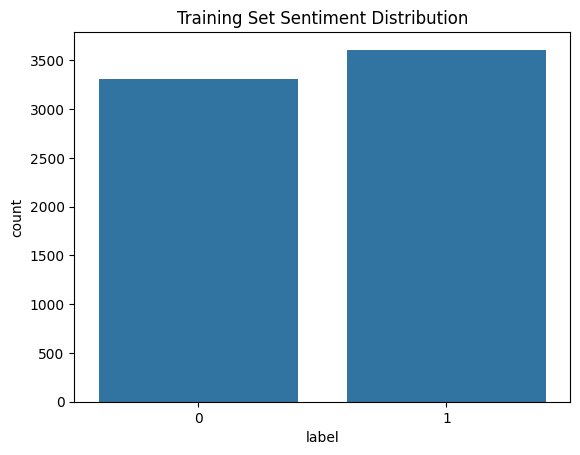

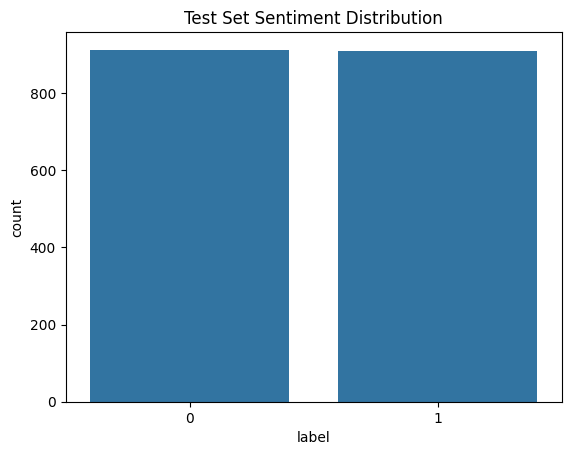

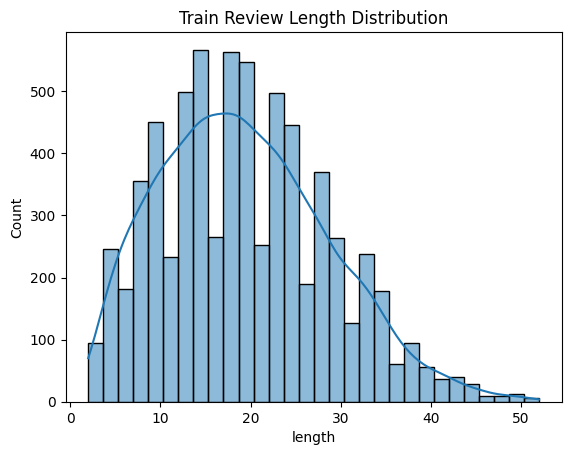

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Class distribution
sns.countplot(data=df_train, x='label')
plt.title("Training Set Sentiment Distribution")
plt.show()

sns.countplot(data=df_test, x='label')
plt.title("Test Set Sentiment Distribution")
plt.show()

# text length
df_train['length'] = df_train['text'].apply(lambda x: len(x.split()))
df_test['length']  = df_test['text'].apply(lambda x: len(x.split()))

sns.histplot(df_train['length'], kde=True, bins=30)
plt.title("Train Review Length Distribution")
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))  # you can tweak this

# Fit on training, transform both train and test
X_train = vectorizer.fit_transform(df_train['text'])
X_test = vectorizer.transform(df_test['text'])

# Labels
y_train = df_train['label']
y_test = df_test['label']


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    print(f"\n{name}")

    # 10-fold CV Accuracy
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    print("CV Accuracy (10-fold):", scores.mean())

    # Train and evaluate on test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Test Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision      :", precision_score(y_test, y_pred))
    print("Recall         :", recall_score(y_test, y_pred))
    print("F1 Score       :", f1_score(y_test, y_pred))


In [ ]:
# 1. SVM
evaluate_model("SVM (Linear)", LinearSVC(), X_train, y_train, X_test, y_test)

# 2. KNN
evaluate_model("KNN", KNeighborsClassifier(n_neighbors=5), X_train, y_train, X_test, y_test)

# 3. Decision Tree
evaluate_model("Decision Tree", DecisionTreeClassifier(), X_train, y_train, X_test, y_test)

# 4. Random Forest
evaluate_model("Random Forest", RandomForestClassifier(n_estimators=100), X_train, y_train, X_test, y_test)



SVM (Linear)
CV Accuracy (10-fold): 0.7804913294797687
Test Accuracy : 0.7836353651839648
Precision      : 0.7742279020234292
Recall         : 0.7997799779977998
F1 Score       : 0.7867965367965368

KNN
CV Accuracy (10-fold): 0.5173410404624277
Test Accuracy : 0.5304777594728172
Precision      : 0.5342639593908629
Recall         : 0.46314631463146316
F1 Score       : 0.49616971125515613

Decision Tree
CV Accuracy (10-fold): 0.6244219653179192
Test Accuracy : 0.6216364634816035
Precision      : 0.615546218487395
Recall         : 0.6446644664466447
F1 Score       : 0.629768941429339

Random Forest
CV Accuracy (10-fold): 0.710549132947977
Test Accuracy : 0.7243272926963207
Precision      : 0.7057633973710818
Recall         : 0.7678767876787679
F1 Score       : 0.7355110642781876


## **Question 3 (30 Points)**

# **Text Clustering**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)


1.   Perform EDA on selected dataset

2.   **Apply the listed clustering methods ( Any 4) to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

3. **Visualize the clusters**

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [1]:
# Write your code here
import kagglehub

# Download latest version
path = kagglehub.dataset_download("PromptCloudHQ/amazon-reviews-unlocked-mobile-phones")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/amazon-reviews-unlocked-mobile-phones


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/kaggle/input/amazon-reviews-unlocked-mobile-phones/Amazon_Unlocked_Mobile.csv')

# Display the first few rows
df.head()


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [3]:
# Drop rows with missing reviews
df = df.dropna(subset=['Reviews'])

# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)


In [4]:
!pip uninstall -y torch torchvision torchaudio
!pip install torch==2.1.2 torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
!pip install -U sentence-transformers transformers --quiet


Found existing installation: torch 2.1.2+cpu
Uninstalling torch-2.1.2+cpu:
  Successfully uninstalled torch-2.1.2+cpu
Found existing installation: torchvision 0.16.2+cpu
Uninstalling torchvision-0.16.2+cpu:
  Successfully uninstalled torchvision-0.16.2+cpu
Found existing installation: torchaudio 2.1.2+cpu
Uninstalling torchaudio-2.1.2+cpu:
  Successfully uninstalled torchaudio-2.1.2+cpu
Looking in indexes: https://download.pytorch.org/whl/cpu
  Using cached https://download.pytorch.org/whl/cpu/torch-2.1.2%2Bcpu-cp311-cp311-linux_x86_64.whl (184.9 MB)
  Using cached https://download.pytorch.org/whl/cpu/torchvision-0.21.0%2Bcpu-cp311-cp311-linux_x86_64.whl.metadata (6.1 kB)
  Using cached https://download.pytorch.org/whl/cpu/torchaudio-2.6.0%2Bcpu-cp311-cp311-linux_x86_64.whl.metadata (6.6 kB)
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
  Using cached https://download.pytorch.org/whl/c

In [5]:
# Install the sentence-transformers library
!pip install -q sentence-transformers

from sentence_transformers import SentenceTransformer

# Load the pre-trained BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for the reviews
embeddings = model.encode(df['Reviews'].tolist(), show_progress_bar=True)
import numpy as np
np.save("bert_embeddings.npy", embeddings)  # Save to file



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Batches:   0%|          | 0/12931 [00:00<?, ?it/s]

In [6]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(embeddings)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50, random_state=42)
reduced_embeddings = pca.fit_transform(embeddings)

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(reduced_embeddings)

print("DBSCAN clustering complete.")
print("Number of clusters (excluding noise):", len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0))
print("Points marked as noise:", list(dbscan_labels).count(-1))


In [ ]:
hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical_labels = hierarchical.fit_predict(reduced_embeddings)


In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reduce to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_results = tsne.fit_transform(reduced_embeddings)

# Helper function to plot clusters
def plot_clusters(labels, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='viridis', s=10)
    plt.title(title)
    plt.xlabel("TSNE Component 1")
    plt.ylabel("TSNE Component 2")
    plt.show()

plot_clusters(kmeans_labels, "K-Means Clustering")
plot_clusters(dbscan_labels, "DBSCAN Clustering")
plot_clusters(hierarchical_labels, "Hierarchical Clustering")


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

I applied K-means, DBSCAN, Hierarchical clustering, and BERT-based embeddings to group Amazon mobile phone reviews. Among these, BERT embeddings combined with t-SNE produced the most semantically meaningful and visually distinct clusters, capturing subtle variations in review tone and sentiment. K-means also performed well, forming compact groupings especially after reducing the embedding dimensionality with PCA. DBSCAN initially ran into performance issues due to the high dimensionality of the data, but applying PCA made it feasible, although it still identified a significant number of points as noise. Hierarchical clustering was slower and more computationally intensive but produced clear separations once PCA was applied. Overall, BERT-based clustering provided the most contextually accurate insights, while the classical clustering methods benefited significantly from dimensionality reduction.


# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises and on Teaching Assistant by filling this form:

https://docs.google.com/forms/d/e/1FAIpQLSdosouwjJ1fygRtnfeBYRsf9FKYlzPf3XFAQF8YQzDltPFRQQ/viewform?usp=dialog

**(Your submission will not be graded if this question is left unanswered)**

